In [1]:
#https://www.kaggle.com/code/zarasim/video-game-sales-analysis#14
#https://www.kaggle.com/code/nicolasgertler/video-game-sales-eda-prediction#Machine-Learning

#https://www.kaggle.com/datasets/gregorut/videogamesales/code
#https://www.kaggle.com/code/kagleo123/video-game-sales-eda-ml-classification#3.-Machine-Learning-_-Classification

#https://www.kaggle.com/code/mohamedmallouk/vgsales-fixing-some-dates-visualization-and-ml

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('vgsales.csv',nrows=10000)

In [4]:
df

Rank                                Name Platform    Year  \
0         1                          Wii Sports      Wii  2006.0   
1         2                   Super Mario Bros.      NES  1985.0   
2         3                      Mario Kart Wii      Wii  2008.0   
3         4                   Wii Sports Resort      Wii  2009.0   
4         5            Pokemon Red/Pokemon Blue       GB  1996.0   
...     ...                                 ...      ...     ...   
9995   9997    Army Men: Soldiers of Misfortune       DS  2008.0   
9996   9998          GT Advance 2: Rally Racing      GBA  2001.0   
9997   9999  Mystery P.I. - Portrait of a Thief       DS  2008.0   
9998  10000                              Yakuza      PS3  2012.0   
9999  10001     DOA 2: Dead or Alive 2 Hardcore      PS2  2000.0   

             Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0           Sports    Nintendo     41.49     29.02      3.77         8.46   
1         Platform    Nintendo     29.08      3.58      6.81         0.77   
2           Racing    Nintendo     15.85     12.88      3.79         3.31   
3           Sports    Nintendo     15.75     11.01      3.28         2.96   
4     Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...            ...         ...       ...       ...       ...          ...   
9995       Shooter   Zoo Games      0.11      0.00      0.00         0.01   
9996        Racing         THQ      0.08      0.03      0.00         0.00   
9997     Adventure     Unknown      0.11      0.00      0.00         0.01   
9998        Action        Sega      0.00      0.00      0.11         0.00   
9999      Fighting  Tecmo Koei      0.00      0.00      0.11         0.00   

      Global_Sales  
0            82.74  
1            40.24  
2            35.82  
3            33.00  
4            31.37  
...            ...  
9995          0.12  
9996          0.11  
9997          0.11  
9998          0.11  
9999          0.11  

[10000 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          10000 non-null  int64  
 1   Name          10000 non-null  object 
 2   Platform      10000 non-null  object 
 3   Year          9841 non-null   float64
 4   Genre         10000 non-null  object 
 5   Publisher     9970 non-null   object 
 6   NA_Sales      10000 non-null  float64
 7   EU_Sales      10000 non-null  float64
 8   JP_Sales      10000 non-null  float64
 9   Other_Sales   10000 non-null  float64
 10  Global_Sales  10000 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 859.5+ KB


In [6]:
df.describe()

Rank         Year      NA_Sales      EU_Sales      JP_Sales  \
count  10000.000000  9841.000000  10000.000000  10000.000000  10000.000000   
mean    5001.434700  2005.702876      0.422846      0.235461      0.118754   
std     2887.001411     6.186410      1.021100      0.634974      0.392549   
min        1.000000  1980.000000      0.000000      0.000000      0.000000   
25%     2501.750000  2002.000000      0.090000      0.020000      0.000000   
50%     5001.500000  2007.000000      0.180000      0.080000      0.000000   
75%     7501.250000  2010.000000      0.420000      0.220000      0.080000   
max    10001.000000  2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  10000.000000  10000.000000  
mean       0.078017      0.857722  
std        0.238246      1.937793  
min        0.000000      0.110000  
25%        0.010000      0.200000  
50%        0.030000      0.380000  
75%        0.070000      0.830000  
max       10.570000     82.740000

In [7]:
df.shape

(10000, 11)

In [8]:
df.isnull()

Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  \
0     False  False     False  False  False      False     False     False   
1     False  False     False  False  False      False     False     False   
2     False  False     False  False  False      False     False     False   
3     False  False     False  False  False      False     False     False   
4     False  False     False  False  False      False     False     False   
...     ...    ...       ...    ...    ...        ...       ...       ...   
9995  False  False     False  False  False      False     False     False   
9996  False  False     False  False  False      False     False     False   
9997  False  False     False  False  False      False     False     False   
9998  False  False     False  False  False      False     False     False   
9999  False  False     False  False  False      False     False     False   

      JP_Sales  Other_Sales  Global_Sales  
0        False        False         False  
1        False        False         False  
2        False        False         False  
3        False        False         False  
4        False        False         False  
...        ...          ...           ...  
9995     False        False         False  
9996     False        False         False  
9997     False        False         False  
9998     False        False         False  
9999     False        False         False  

[10000 rows x 11 columns]

In [9]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [10]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            159
Genre             0
Publisher        30
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.max()

Rank                                 10001
Name            wwe Smackdown vs. Raw 2006
Platform                              XOne
Year                                2020.0
Genre                             Strategy
NA_Sales                             41.49
EU_Sales                             29.02
JP_Sales                             10.22
Other_Sales                          10.57
Global_Sales                         82.74
dtype: object

In [13]:
# Fill missing year with max year
df['Year']=df['Year'].fillna(df['Year'].max())

In [14]:
# Fill missing publisher
df.Publisher=df.Publisher.fillna("xyz")

In [15]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
df.nunique()

Rank            10000
Name             6846
Platform           28
Year               38
Genre              12
Publisher         344
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      613
dtype: int64

In [17]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
       dtype='object')]

In [18]:
# Populate list of numerical and categorical variables

import pandas as pd
import pandas.api.types as ptypes

num_list = []
cat_list = []

for column in df:
    if ptypes.is_numeric_dtype(df[column]):
        num_list.append(column) 
    elif ptypes.is_string_dtype(df[column]):
        cat_list.append(column)

print("Numerical: ", num_list) 
print(" ")
print("Categorical: ", cat_list)

Numerical:  ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
 
Categorical:  ['Name', 'Platform', 'Genre', 'Publisher']


In [19]:
#'''How many games belong to each platform?'''

# Find all platforms
platforms = df['Platform'].unique()

# Find total for each platform:
dt = pd.DataFrame(df)
total_games = []
for platform in platforms:
  total = 0
  for row in df['Platform']:
    if row == platform:
      total += 1
  total_games.append(total)

for i in range(len(total_games)):
  print(f'{platforms[i]}: {total_games[i]}')

Wii: 880
NES: 95
GB: 93
DS: 1030
X360: 939
PS3: 973
PS2: 1474
SNES: 187
GBA: 485
3DS: 264
PS4: 207
N64: 246
PS: 862
XB: 475
PC: 291
2600: 131
PSP: 508
XOne: 143
GC: 326
WiiU: 94
GEN: 17
DC: 29
PSV: 145
SAT: 92
SCD: 2
WS: 5
NG: 6
TG16: 1


In [20]:
# Find the most common genre of video games
most_common_genre = df['Genre'].mode()[0]

# Print the most common genre
print("The most common genre:", most_common_genre)

The most common genre: Action


# Data visualization

In [21]:
df1 = df.head(20)

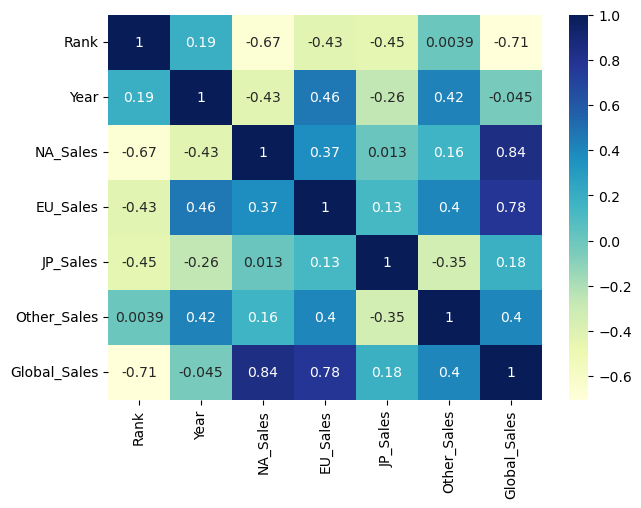

In [22]:
plt.figure(figsize = (7,5))        
sns.heatmap(df1.corr(),cmap="YlGnBu",annot = True)
plt.show()

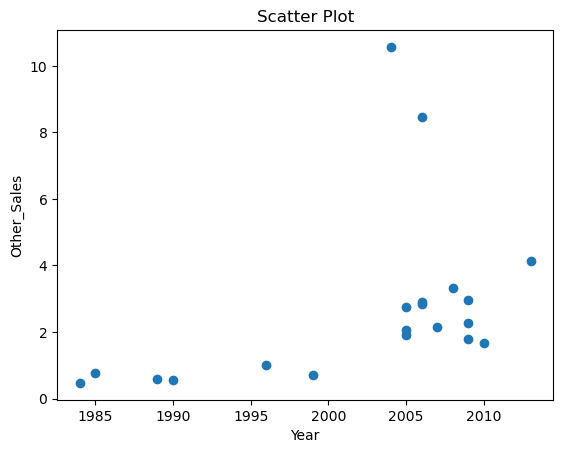

In [23]:
import matplotlib.pyplot as plt
# Scatter plot 
plt.scatter(df1['Year'], df1['Other_Sales'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('Other_Sales')
 
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2005.0'),
  Text(1, 0, '2006.0'),
  Text(2, 0, '2009.0'),
  Text(3, 0, '1984.0'),
  Text(4, 0, '1985.0'),
  Text(5, 0, '1989.0'),
  Text(6, 0, '1990.0'),
  Text(7, 0, '1996.0'),
  Text(8, 0, '1999.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2007.0'),
  Text(11, 0, '2008.0'),
  Text(12, 0, '2010.0'),
  Text(13, 0, '2013.0')])

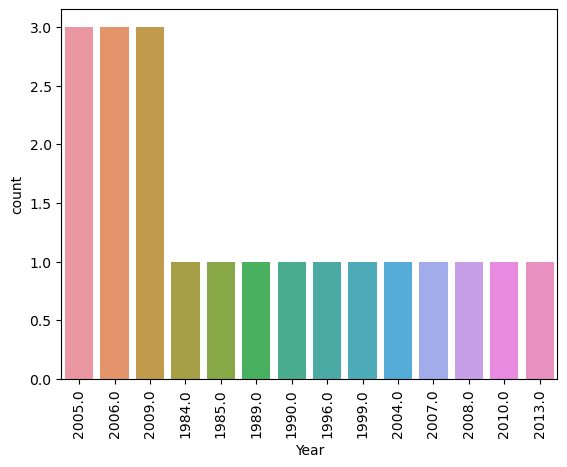

In [24]:
#Most game relesed on which year
sns.countplot(x="Year", data=df1, order = df1.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

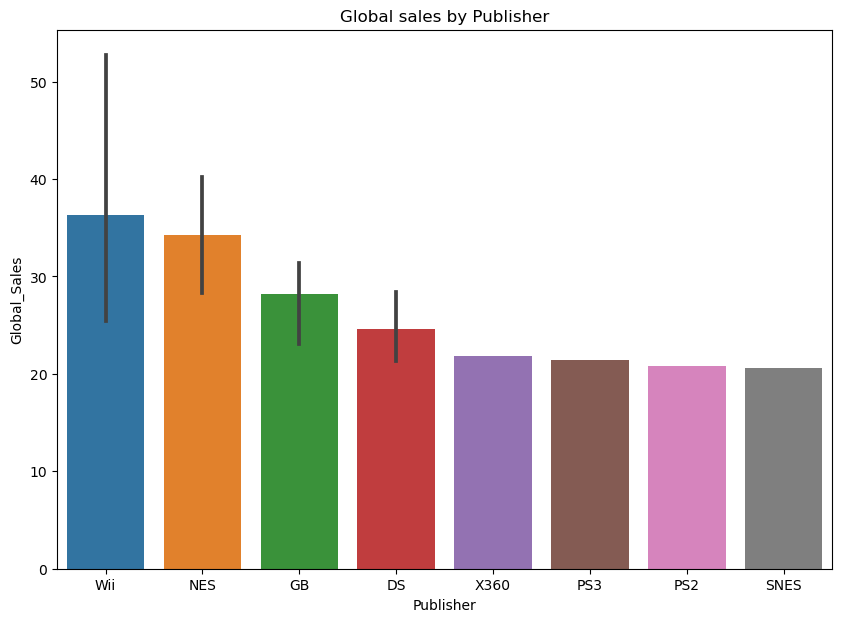

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x=df1["Platform"],y=df1["Global_Sales"])
plt.xlabel("Publisher")
plt.ylabel("Global_Sales")
plt.title("Global sales by Publisher")
plt.show()

In [26]:
import plotly.express as px
df1_platform = df1.loc[df1.groupby('Platform')['Global_Sales'].idxmax()]
df1_platform = df1_platform.sort_values(by=['Global_Sales'] , ascending=False)

fig = px.bar(df1_platform, x='Platform', y='Global_Sales')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

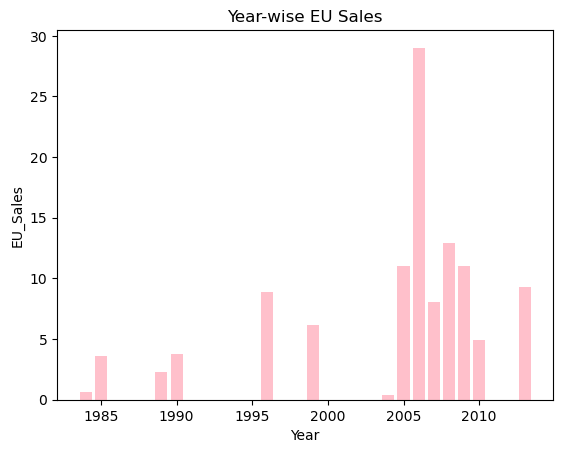

In [27]:
# Bar chart 
plt.bar(df1['Year'], df1['EU_Sales'],color=["pink"])

plt.title('Year-wise EU Sales') 
 
# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('EU_Sales')
 
# Adding the legends
plt.show

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Platform'),
  Text(2, 0, 'Racing'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Puzzle'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Action')])

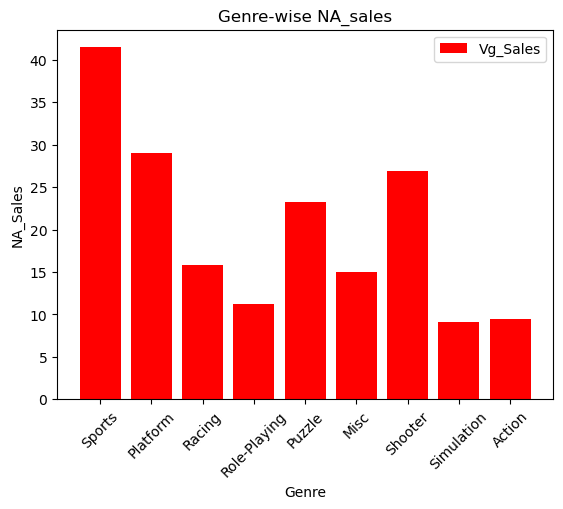

In [28]:
# Bar Plot

x = df1["Genre"]
y = df1["NA_Sales"]
plt.bar(x,y,color=["red"])
plt.xlabel("Genre")
plt.ylabel("NA_Sales")
plt.title("Genre-wise NA_sales")
plt.legend(["Vg_Sales"],loc="upper right")
plt.xticks(rotation=45)

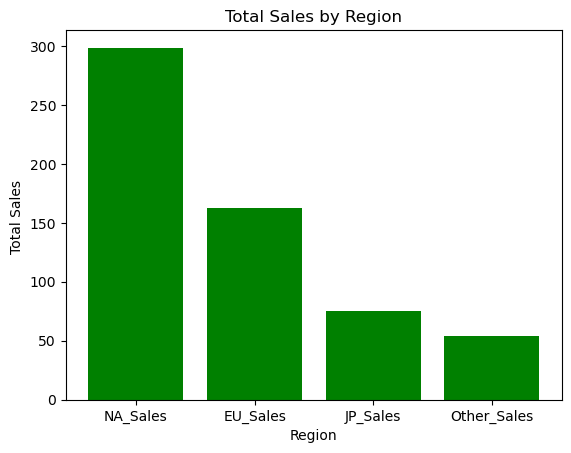

In [29]:
#Which region has the highest number of total sales?
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = df1[regions].sum()
plt.bar(regions, sales_data,color=["green"])
plt.title('Total Sales by Region')
plt.xlabel('Region')  
plt.ylabel('Total Sales ')
plt.show()

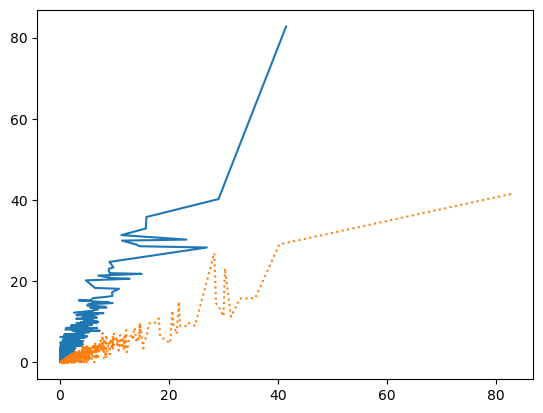

In [30]:
x = df["NA_Sales"]
y = df["Global_Sales"]
plt.plot(x,y,linestyle = "-")
plt.plot(y,x,linestyle = ":")
plt.show()

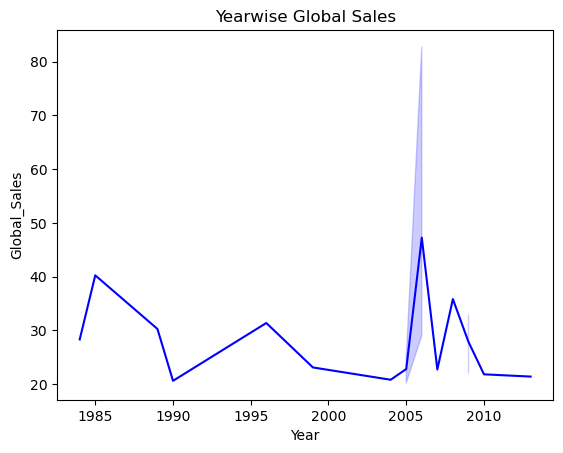

In [31]:
#Year-wise total global sales
sns.lineplot(x=df1["Year"],y=df1["Global_Sales"],color='b')
plt.xlabel("Year")
plt.ylabel("Global_Sales")
plt.title("Yearwise Global Sales")
plt.show()

2006.0


<Axes: xlabel='Years (1980-2020)', ylabel='Sales'>

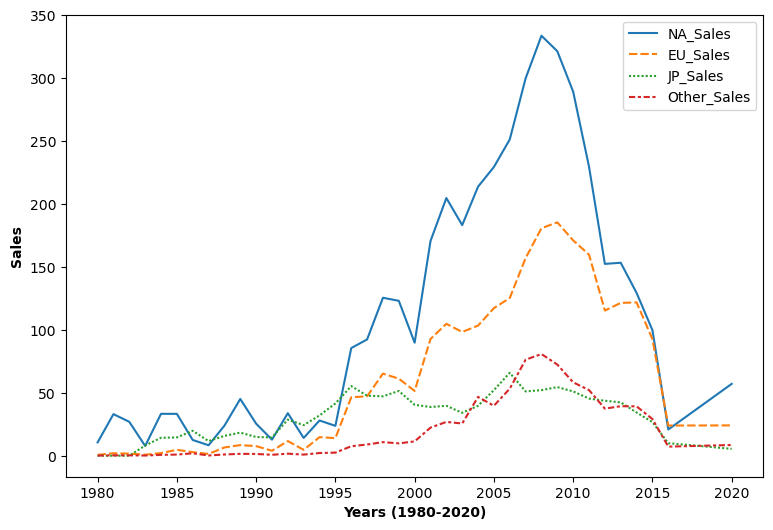

In [32]:
#Which year had the highest Sales worldwide 
SalesbyYear = df1.groupby('Year')['Global_Sales'].sum()
high_year = SalesbyYear.idxmax() 
# find the Year with highest Sales
print(high_year)


Total_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
Total_sales
plt.figure(figsize=(9, 6))
plt.xlabel('Years (1980-2020)', weight='bold')
plt.ylabel('Sales', weight='bold')
sns.lineplot(data=Total_sales)

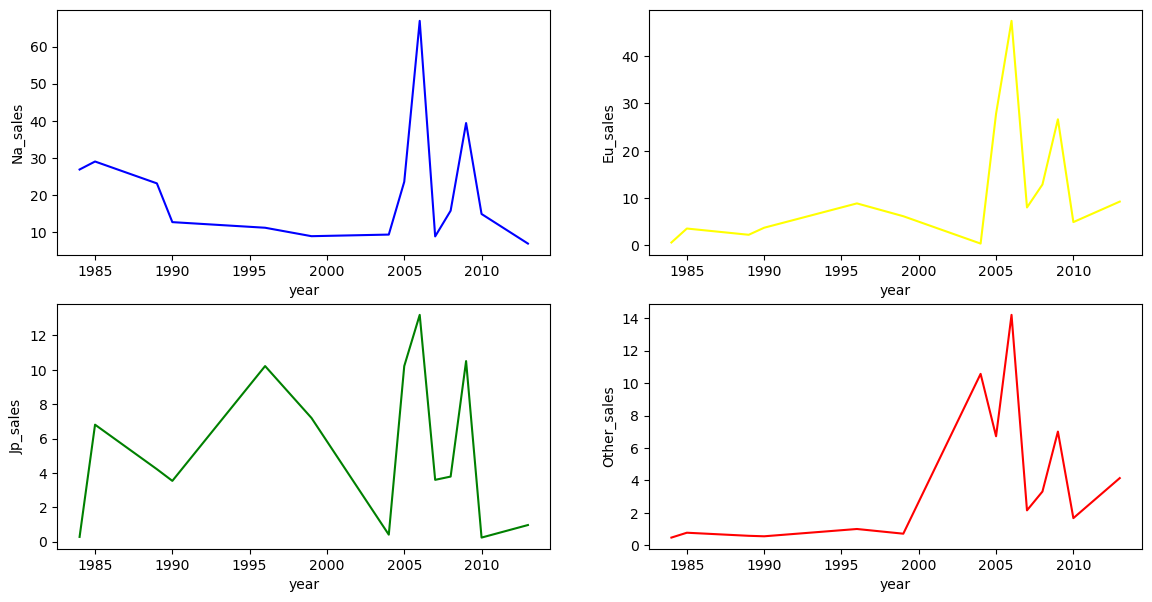

In [33]:
na_sales_year = df1.groupby("Year")["NA_Sales"].sum()
eu_sales_year = df1.groupby("Year")["EU_Sales"].sum()
jp_sales_year = df1.groupby("Year")["JP_Sales"].sum()
other_sales_year = df1.groupby("Year")["Other_Sales"].sum()

fig, ax = plt.subplots(2, 2, figsize=(14,7))

ax[0,0].plot(na_sales_year.index, na_sales_year.values, color="blue")
ax[0,1].plot(eu_sales_year.index, eu_sales_year.values, color="yellow")
ax[1,0].plot(jp_sales_year.index, jp_sales_year.values, color="green")
ax[1,1].plot(other_sales_year.index, other_sales_year.values, color="red")

ax[0,0].set_xlabel("year")
ax[0,1].set_xlabel("year")
ax[1,0].set_xlabel("year")
ax[1,1].set_xlabel("year")

ax[0,0].set_ylabel("Na_sales")
ax[0,1].set_ylabel("Eu_sales")
ax[1,0].set_ylabel("Jp_sales")
ax[1,1].set_ylabel("Other_sales")

plt.show()

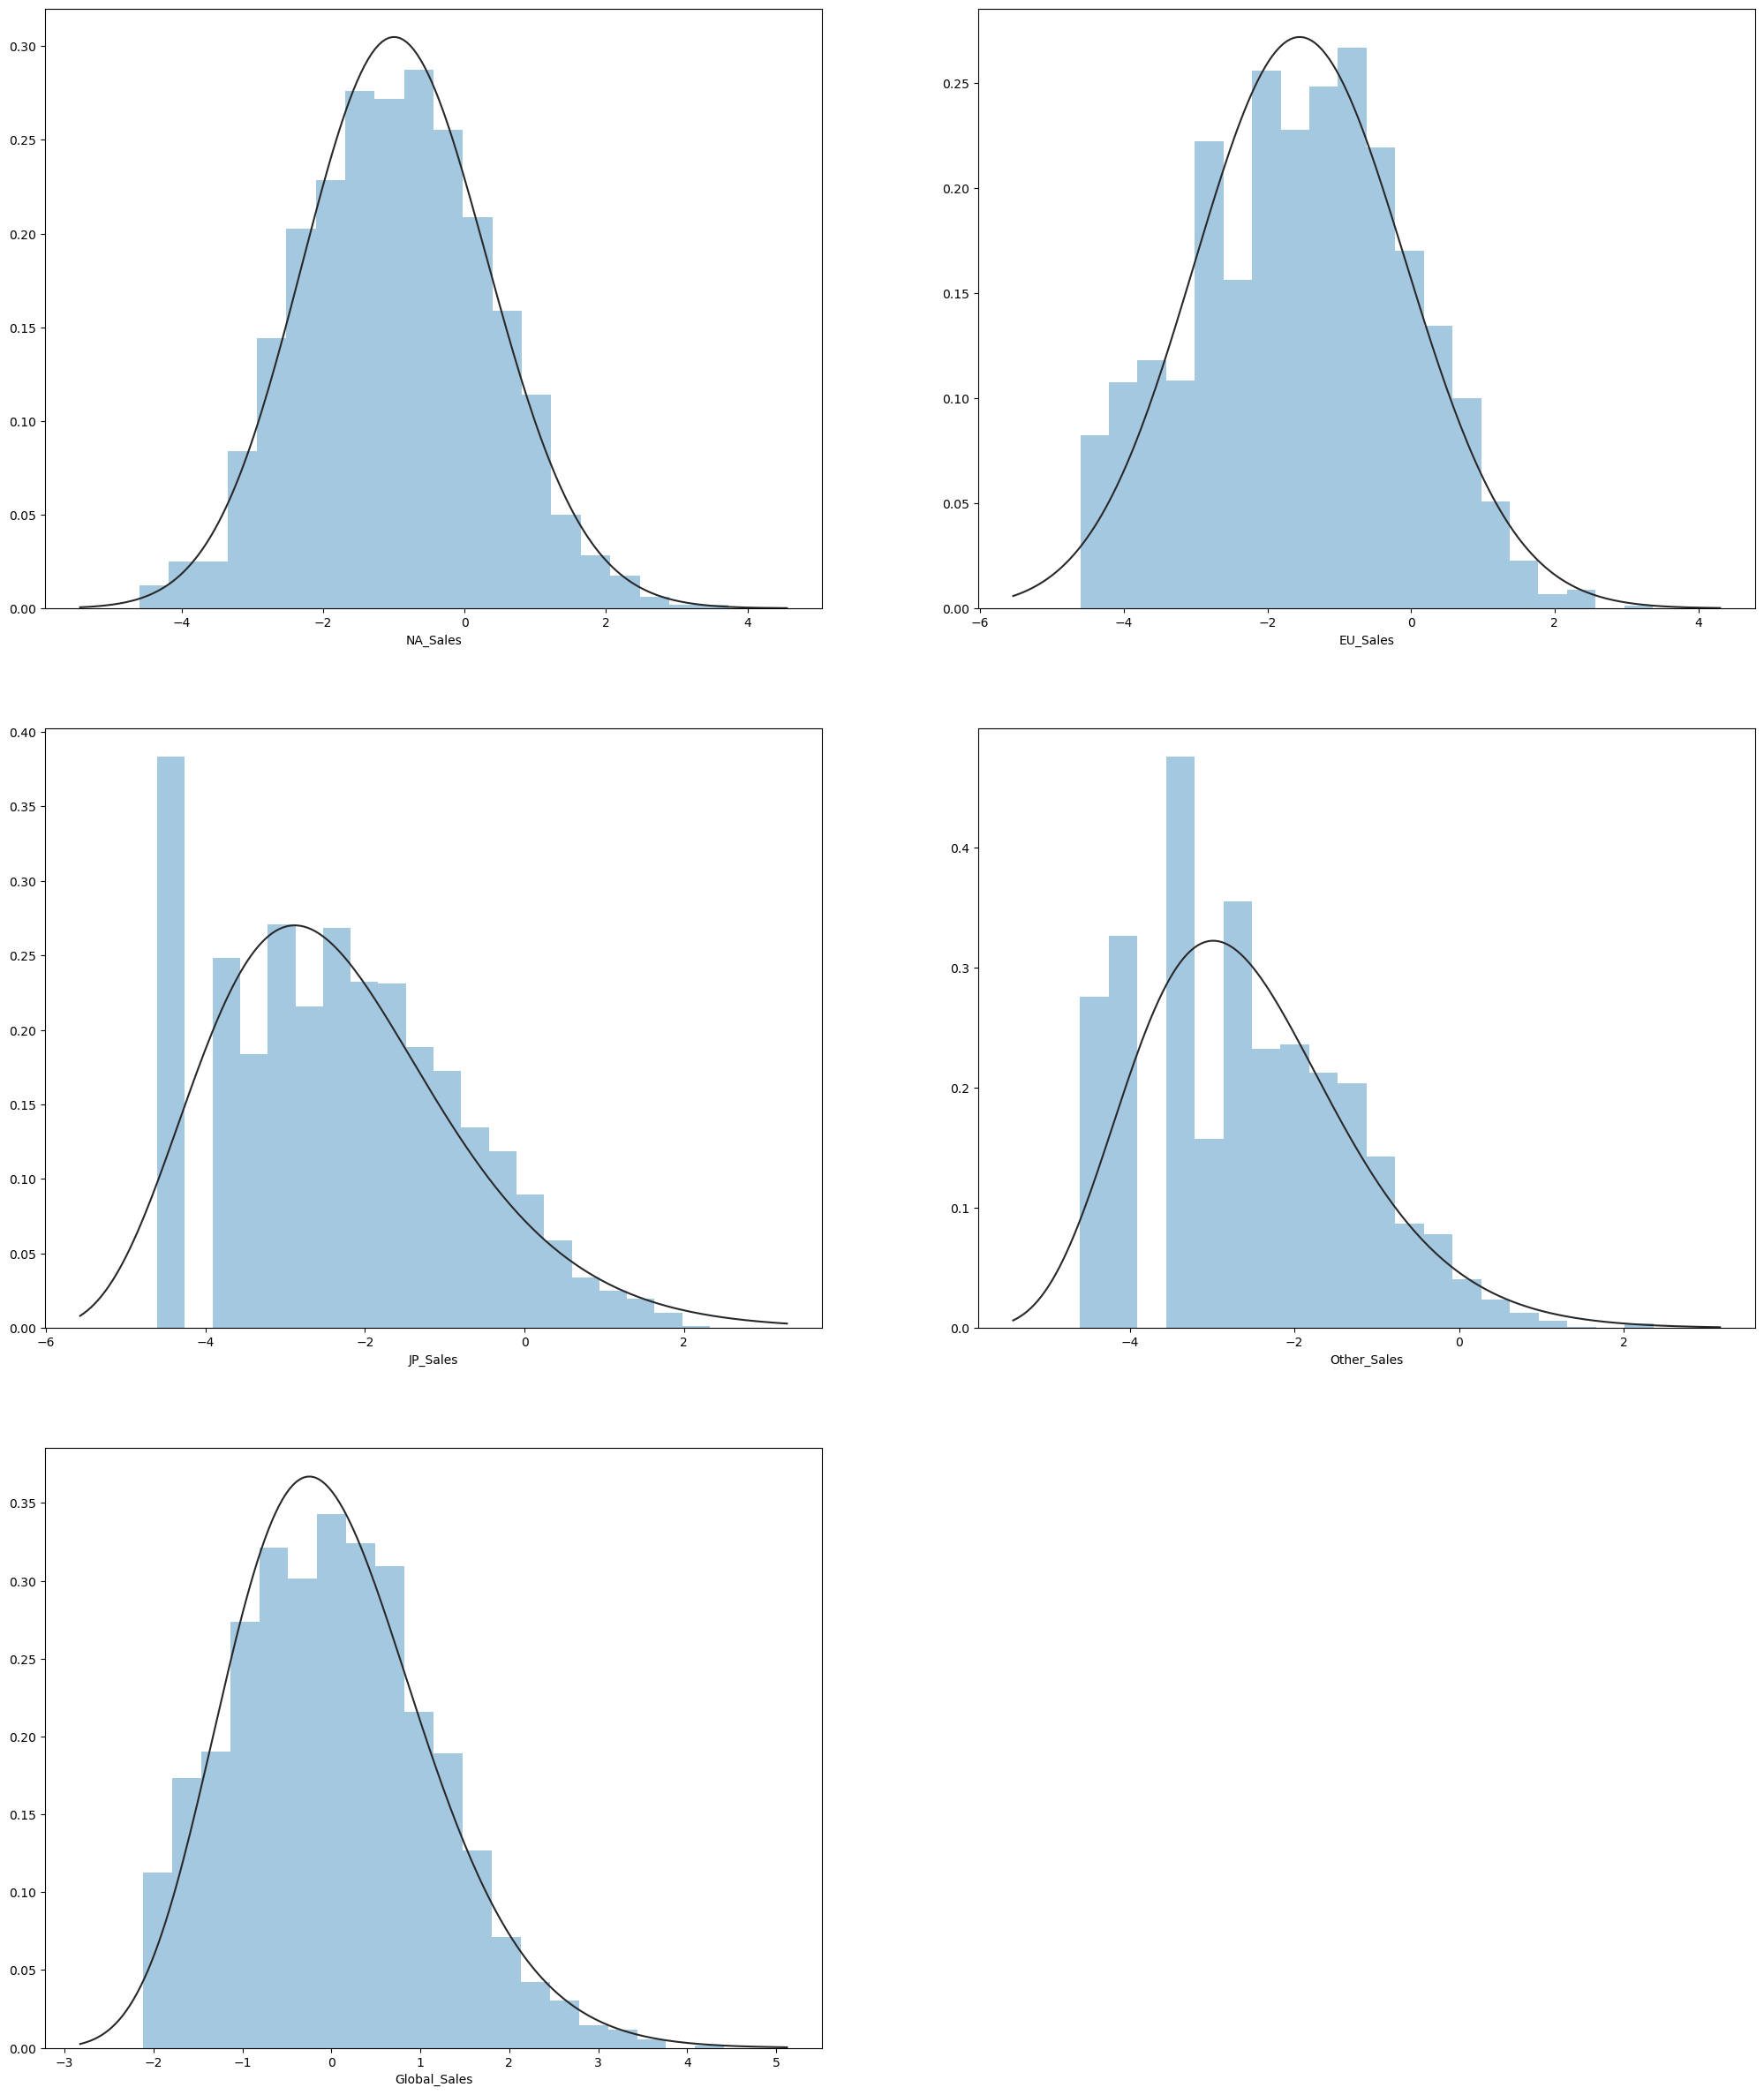

In [34]:
from scipy import stats
df_hist_log = df.copy()
df_hist_log = df_hist_log[df_hist_log.NA_Sales != 0]
df_hist_log = df_hist_log[df_hist_log.EU_Sales != 0]
df_hist_log = df_hist_log[df_hist_log.Other_Sales != 0]
df_hist_log = df_hist_log[df_hist_log.JP_Sales != 0]
df_hist_log = df_hist_log[df_hist_log.Global_Sales != 0]
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(df_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

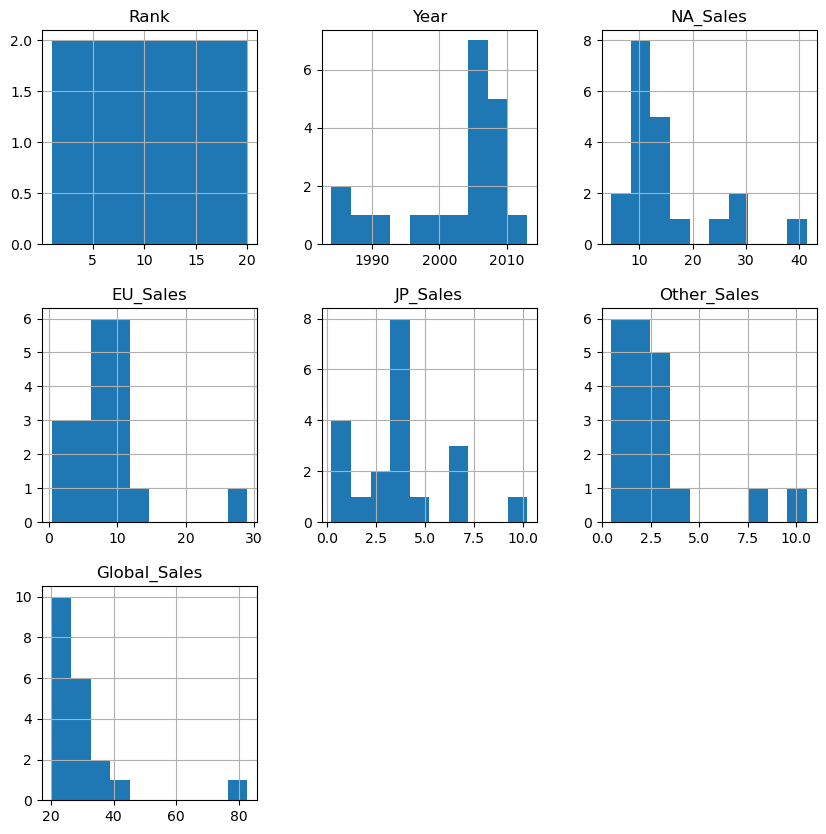

In [35]:
df1.hist(bins=10, figsize=(10, 10))
plt.show()

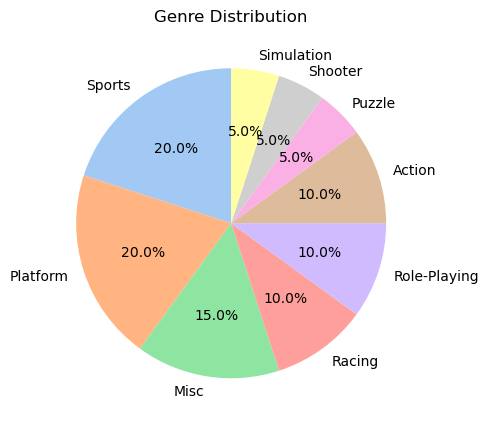

In [36]:
# Pie chart of Genre distribution
plt.figure(figsize=(5,7))
genre_counts = df1['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution')
plt.show()

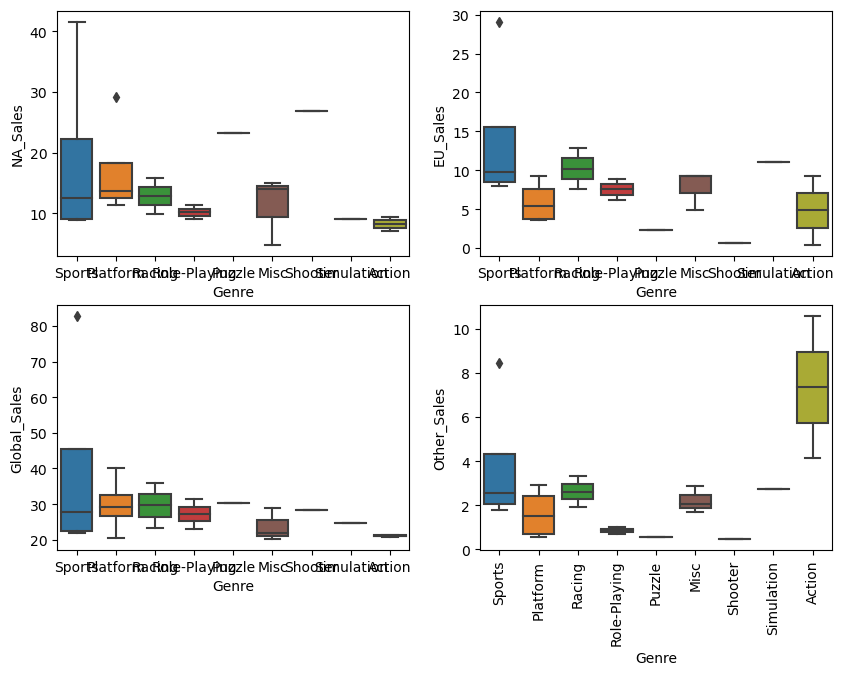

In [83]:
fig, axs = plt.subplots(2,2, figsize = (10,7))
plt1 = sns.boxplot(x = df1['Genre'],y = df1['NA_Sales'], ax = axs[0,0])
plt2 = sns.boxplot(x = df1['Genre'],y = df1['EU_Sales'], ax = axs[0,1])
plt3 = sns.boxplot(x = df1['Genre'],y = df1['Global_Sales'], ax = axs[1,0])
plt4 = sns.boxplot(x = df1['Genre'],y = df1['Other_Sales'], ax = axs[1,1])
plt.xticks(rotation=90)
plt.show()

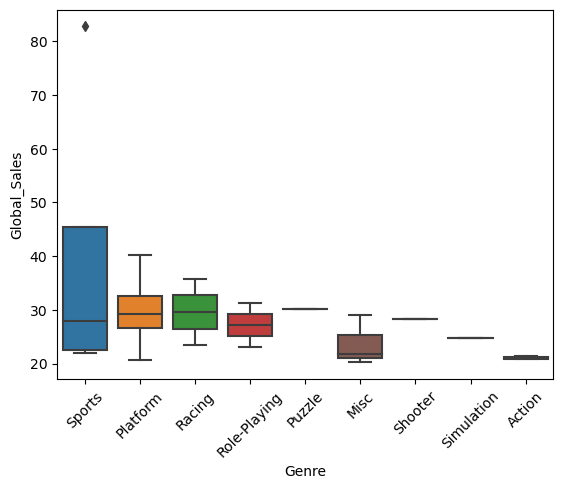

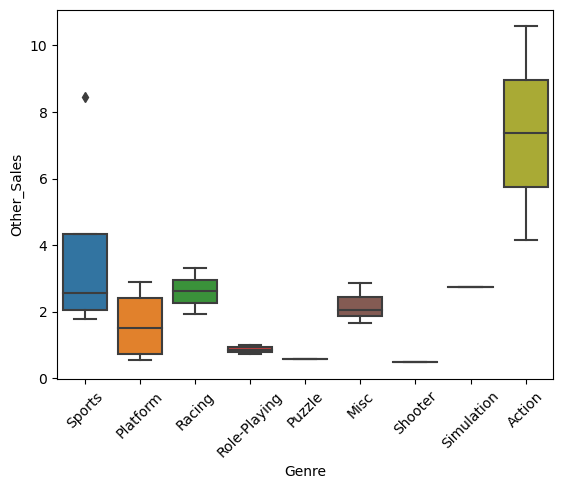

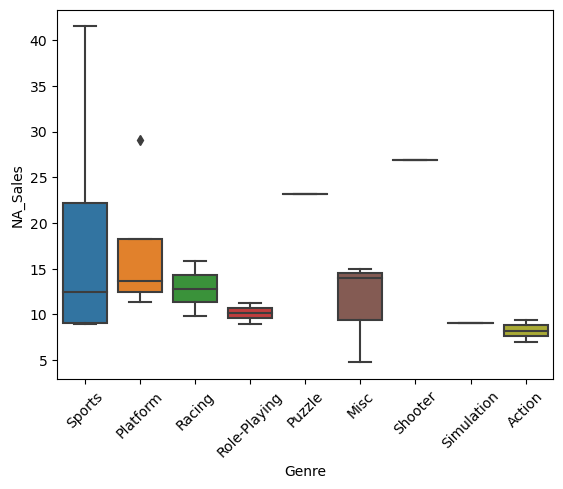

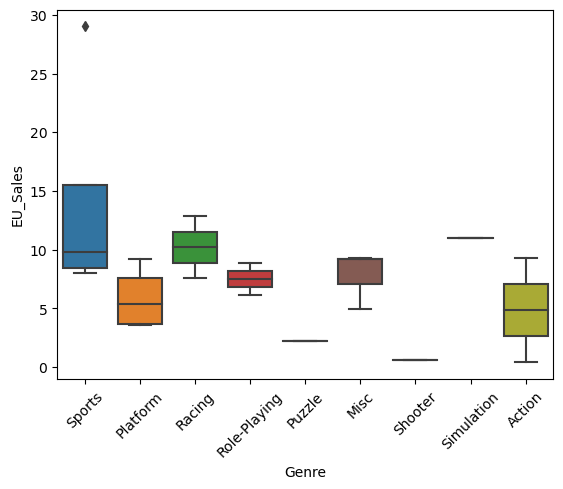

In [38]:
#Boxplpot
continuous = ['Global_Sales', 'Other_Sales', 'NA_Sales', 'EU_Sales']

for i in continuous:
    sns.boxplot(x = df1['Genre'], y = df1[i])
    plt.xticks(rotation=45)
    plt.show()

# pairplot

<Axes: xlabel='NA_Sales', ylabel='Year'>

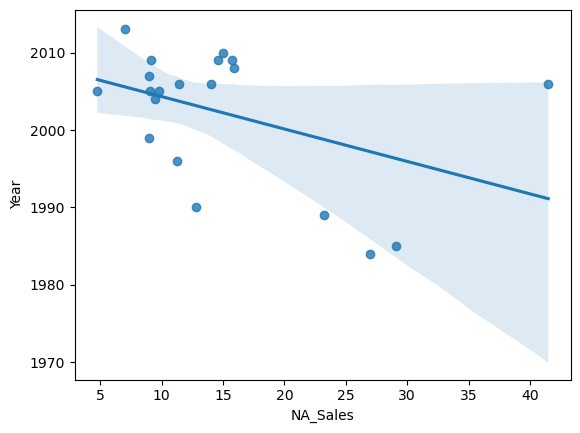

In [39]:
sns.regplot(data = df1, x = 'NA_Sales', y = 'Year')

<Axes: xlabel='Other_Sales', ylabel='Year'>

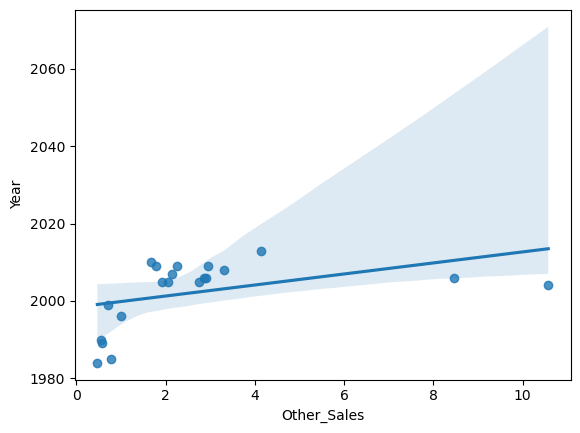

In [40]:
sns.regplot(data = df1, x = 'Other_Sales', y = 'Year')

<Axes: xlabel='EU_Sales', ylabel='Year'>

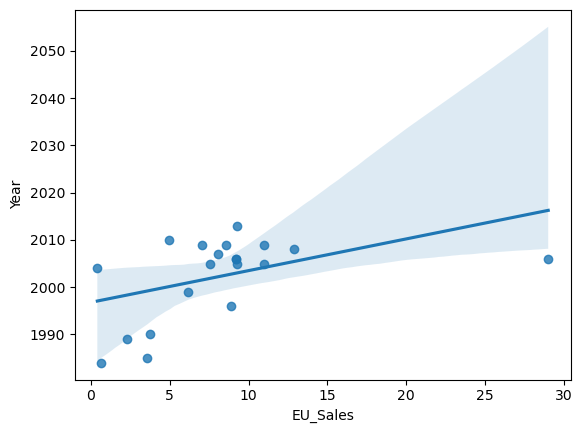

In [41]:
sns.regplot(data = df1, x = 'EU_Sales', y = 'Year')

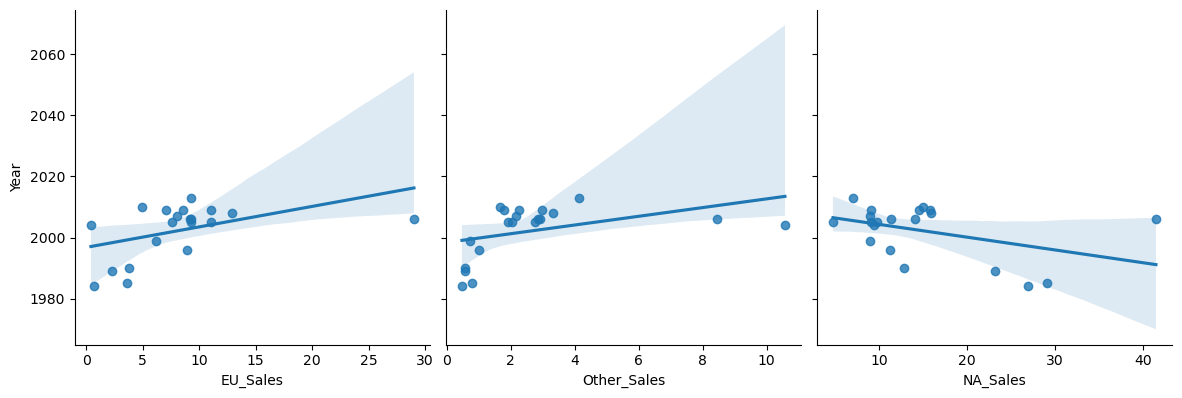

In [42]:
sns.pairplot(df1, x_vars=['EU_Sales', 'Other_Sales', 'NA_Sales'], y_vars='Year',size=4, aspect=1, kind= 'reg' )
plt.show()

# Test - Train split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#converting dependent and independent variables
x = df[["Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
y = df[["Global_Sales"]]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 5)
(7000, 1)
(3000, 5)
(3000, 1)


# linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr_pre = lr.predict(x_test)
lr_pre

array([[ 0.19227615],
       [ 0.14278559],
       [ 0.52211387],
       ...,
       [ 0.8125647 ],
       [22.71533898],
       [ 0.44219367]])

In [51]:
from sklearn.metrics import r2_score

In [52]:
acc_lr = r2_score(y_test,lr_pre)
acc_lr

0.999291099106236

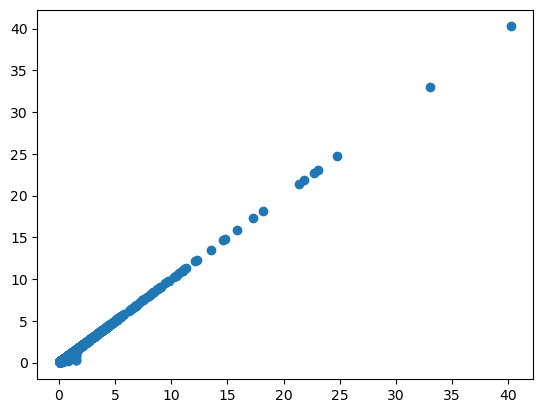

In [53]:
plt.scatter(y_test,lr_pre)

# Decision tree 

In [54]:
from sklearn.tree import DecisionTreeRegressor 

In [55]:
dt = DecisionTreeRegressor()

In [56]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [57]:
dt_pre = dt.predict(x_test)
print(dt_pre)

[ 0.18666667  0.14        0.52       ...  0.78       20.22
  0.44      ]


In [58]:
acc_dt = r2_score(y_test,dt_pre)
acc_dt

0.9476457296145289

# Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()

In [61]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
rf_pre = rf.predict(x_test)
rf_pre

array([ 0.1863406,  0.1422   ,  0.5233   , ...,  0.7965   , 20.7735   ,
        0.4395   ])

In [63]:
acc_rf = r2_score(y_test,rf_pre)
acc_rf

0.9719521180615622

# KNeighbors Regressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [66]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [67]:
knn_pre = knn.predict(x_test)

In [68]:
acc_knn = r2_score(y_test,knn_pre)
print(acc_knn)

0.944994359077101


In [69]:
#comparison

In [76]:
list1=['Linear Regression','Decision Tree','Random Forest','KNN']
list2=[acc_lr,acc_dt,acc_rf,acc_knn]

In [77]:
models = pd.DataFrame({'Model_Name':list1,'score':list2})
models

Model_Name     score
0  Linear Regression  0.999291
1      Decision Tree  0.947646
2      Random Forest  0.971952
3                KNN  0.944994

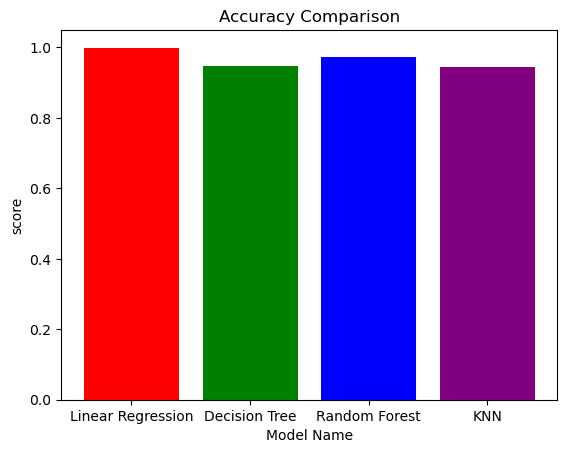

In [79]:
c = ['red','green','blue','purple']
plt.bar(models['Model_Name'],models['score'], color = c)
plt.xlabel("Model Name")
plt.ylabel("score")
plt.title("Accuracy Comparison")
plt.show()